In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
def Redirection_1(Dataframe,col_1,col_2):
    redirection = {}
    df = Dataframe[[col_1,col_2]]
    for i in (range(len(Dataframe))):
        redirection[Dataframe[col_1].iloc[i]] = Dataframe[col_2].iloc[i]
    return redirection

In [3]:
df_busstation = pd.read_csv('D:/Code/YYH/test/chengdu_busstation_gaodev2.csv',low_memory=False)
df_busstation = df_busstation.drop_duplicates(subset=['stop_name','gcj02_lat','gcj02_lng']).reset_index(drop=True)

In [4]:
lat = Redirection_1(df_busstation,'stop_name','gcj02_lat')
lon = Redirection_1(df_busstation,'stop_name','gcj02_lng')

In [5]:
def haversine_distance(df):  #距离计算
    import math
    R = 6371
    dLon = math.radians(df['lon2'] - df['lon1'])
    dLat = math.radians(df['lat2'] - df['lat1'])
    lat1 = math.radians(df['lat1'])
    lat2 = math.radians(df['lat2'])
    a = math.sin(dLat / 2) ** 2 + \
        math.sin(dLon / 2) ** 2 * math.cos(df['lat1']) * math.cos(df['lat2'])
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    dis = R * c
    return dis

In [6]:
def count_method(url):
    data = pd.read_csv(url,low_memory=False)
    data['enstation_time'] = pd.to_datetime(data['enstation_time'])
    data['exstation_time'] = pd.to_datetime(data['exstation_time'],format='mixed')
    data = data[~data['exstation_time'].isna()]
    data = data[data['enstation_time'] != data['exstation_time']]
    data['lon2'] = data['exstation_name'].map(lon)
    data['lat2'] = data['exstation_name'].map(lat)
    data['distance'] = data.apply(haversine_distance,axis=1)
    distance = data['distance'].value_counts()
    data['distance_round'] = np.round(data['distance'])
    distance_round = data['distance_round'].value_counts()
    distance_round = pd.DataFrame(distance_round).sort_values('distance_round')
    distance = pd.DataFrame(distance).sort_values('distance')
    return [distance,distance_round]

In [7]:
TC_data = count_method('0402TC-data下车时间五.csv')
UTC_data_CatBoost = count_method('0402CatBoost下车时间五.csv')
UTC_data_XGBoost = count_method('0402XG下车时间五.csv')
UTC_data_RF = count_method('0402RF下车时间五.csv')
UTC_data_SVM = count_method('D:/Code/YYH/1014小论文/0314补充实验/0227SVM下车时间.csv')

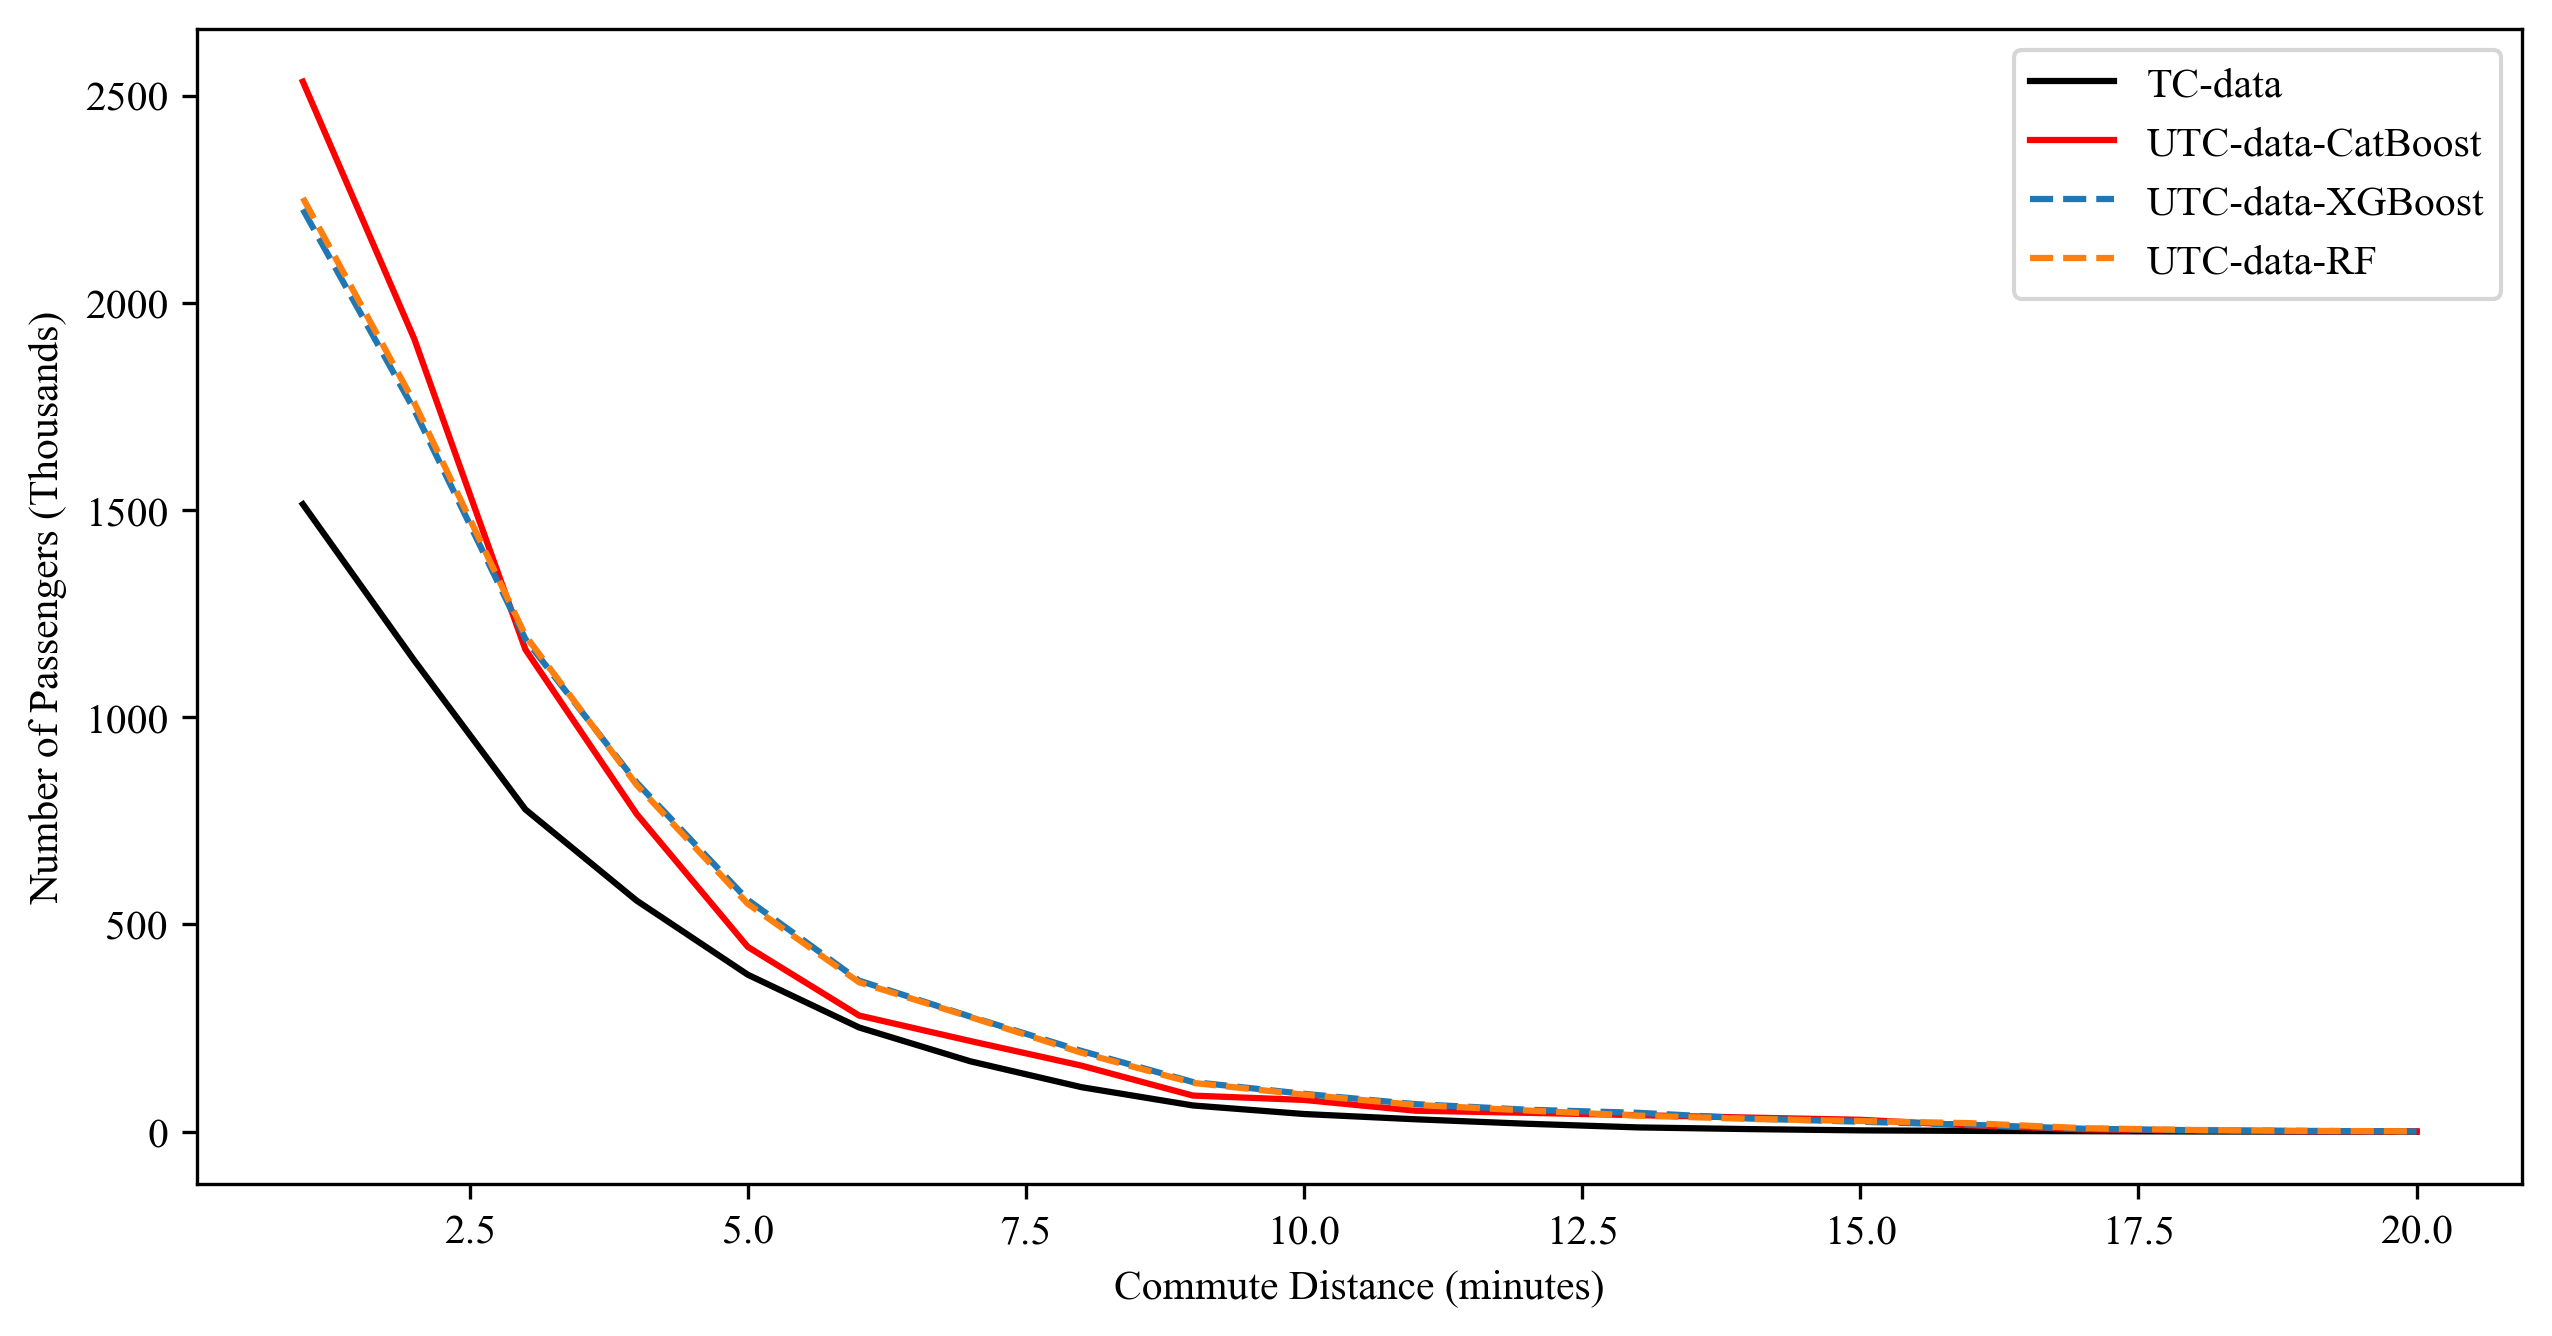

In [22]:
# 1min有round
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][1:20].index,TC_data[r]['count'][1:20] / 1000,label='TC-data',linewidth=lw,color='black')
ax1 = plt.plot(UTC_data_CatBoost[r][1:20].index,UTC_data_CatBoost[r]['count'][1:20] / 1000,label='UTC-data-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][1:20].index,UTC_data_XGBoost[r]['count'][1:20] / 1000,label='UTC-data-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][1:20].index,UTC_data_RF[r]['count'][1:20] / 1000,label='UTC-data-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][:60].index,UTC_data_SVM[r]['count'][:60],label='UTC-data-SVM',linewidth=lw, linestyle='--')
plt.xlabel('Commute Distance (minutes)')
plt.ylabel('Number of Passengers (Thousands)')
ax1 = plt.legend()

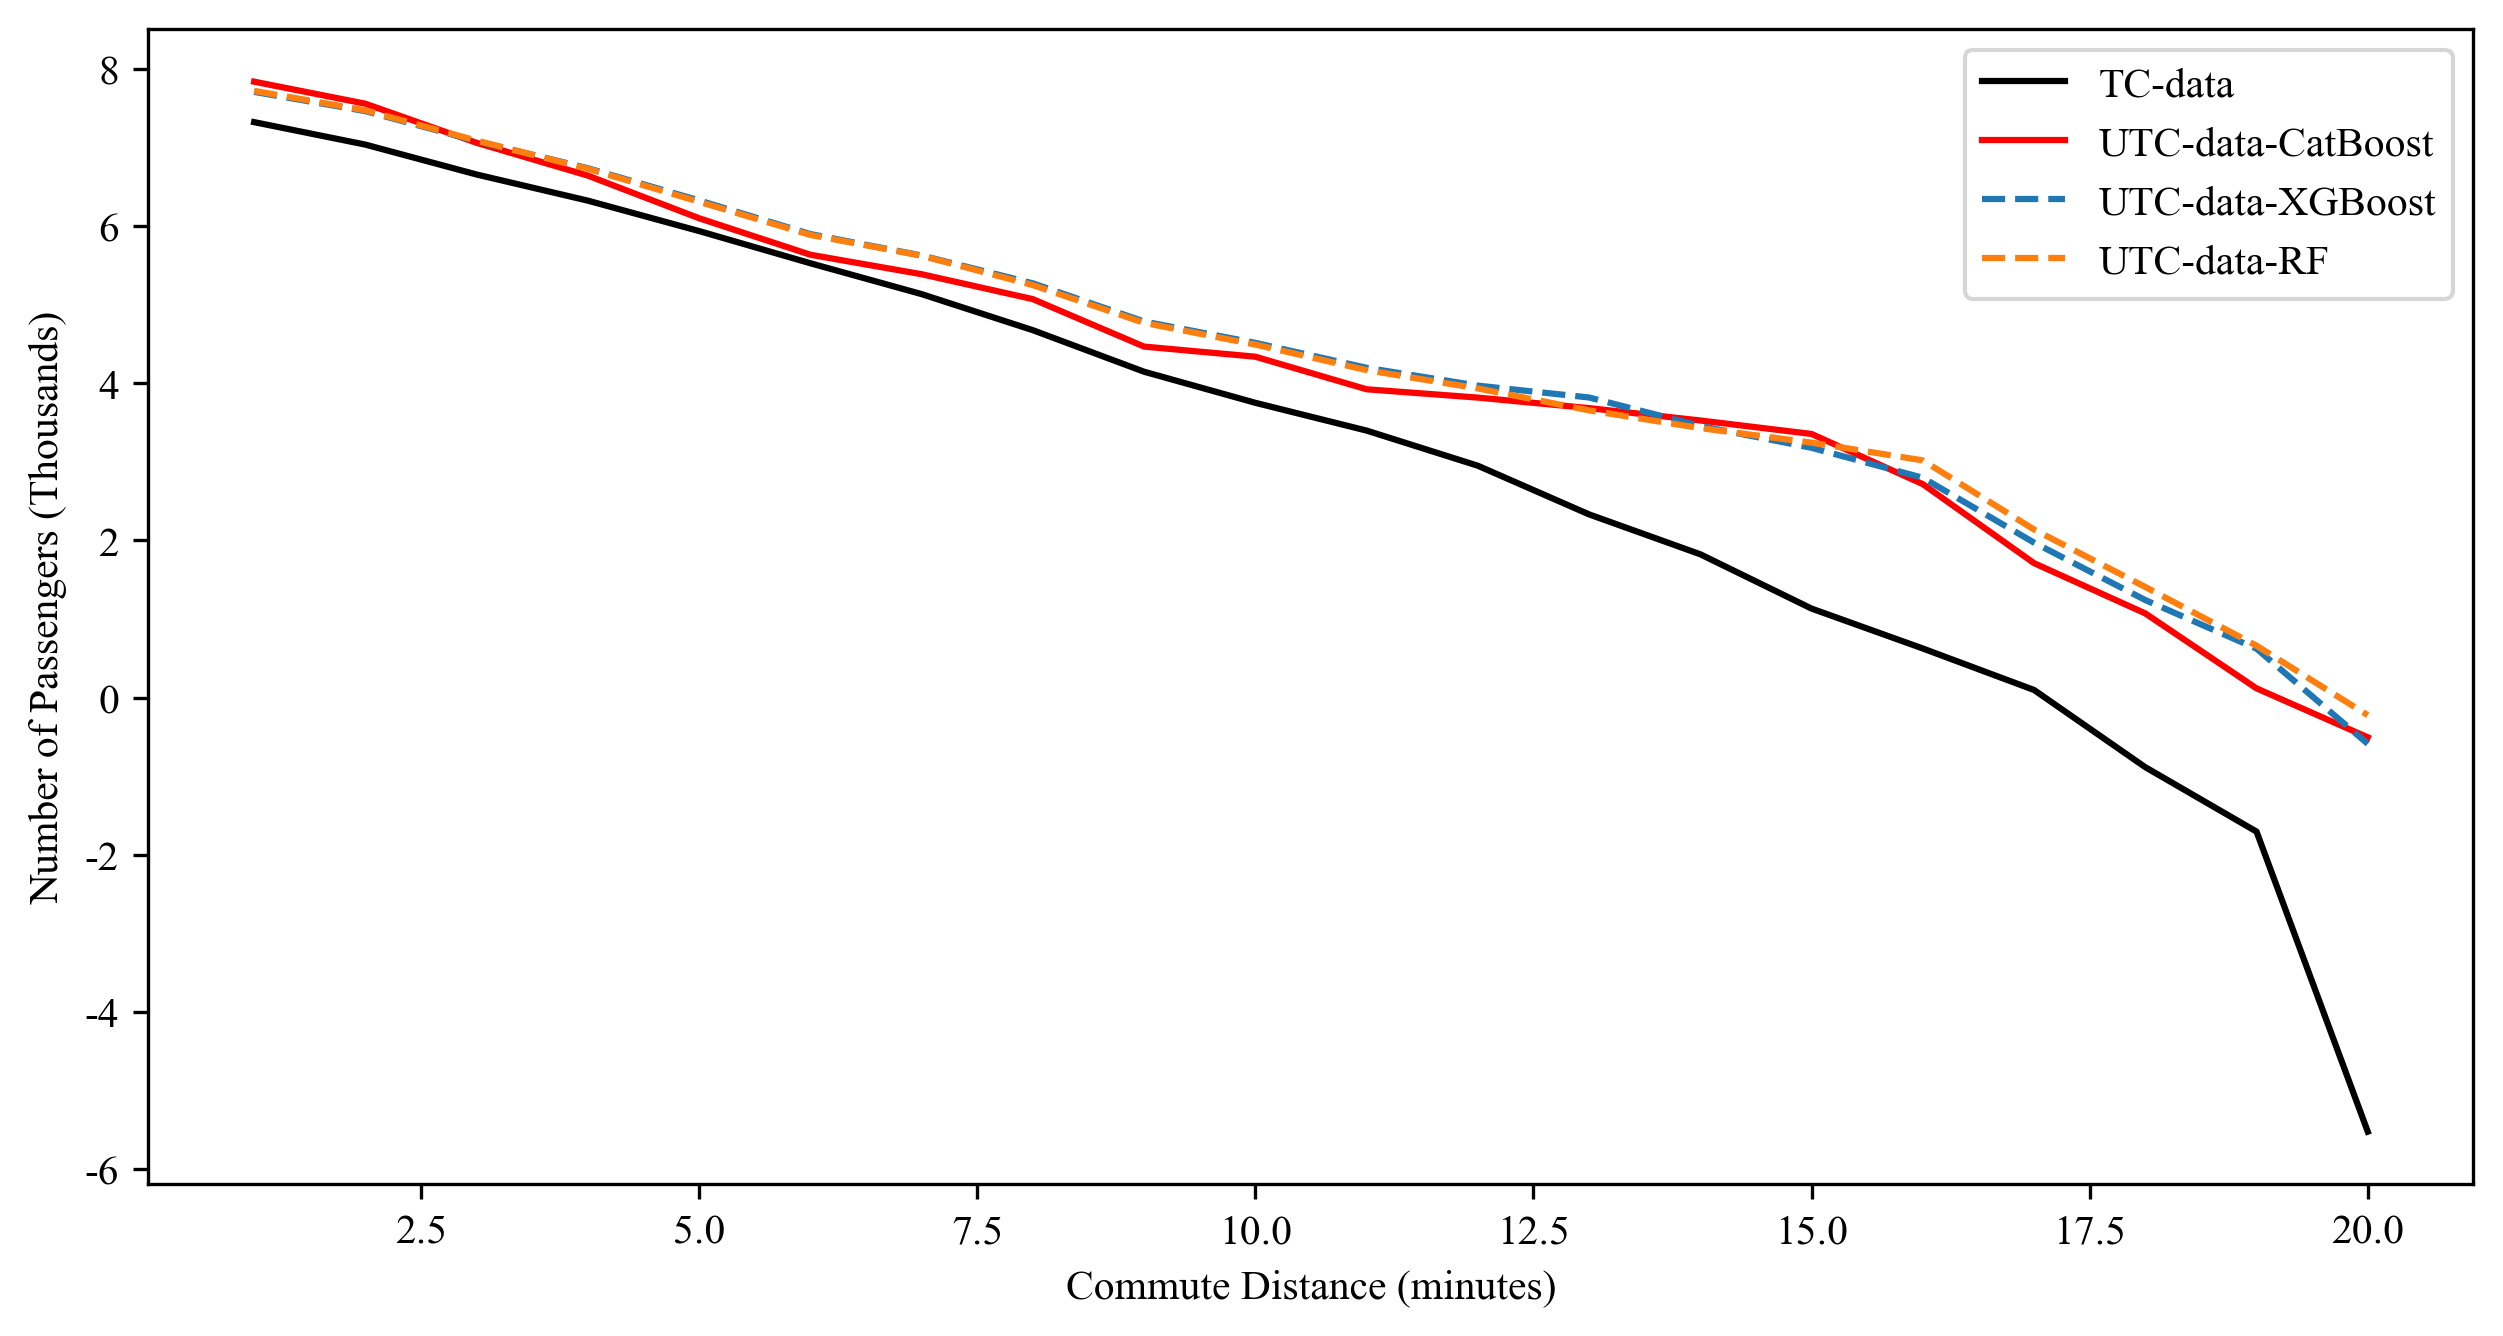

In [8]:
# ln 1min有round
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][1:20].index,np.log(TC_data[r]['count'][1:20] / 1000),label='TC-data',linewidth=lw,color='black')
ax1 = plt.plot(UTC_data_CatBoost[r][1:20].index,np.log(UTC_data_CatBoost[r]['count'][1:20] / 1000),label='UTC-data-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][1:20].index,np.log(UTC_data_XGBoost[r]['count'][1:20] / 1000),label='UTC-data-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][1:20].index,np.log(UTC_data_RF[r]['count'][1:20] / 1000),label='UTC-data-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][:60].index,UTC_data_SVM[r]['count'][:60],label='UTC-data-SVM',linewidth=lw, linestyle='--')
plt.xlabel('Commute Distance (minutes)')
plt.ylabel('Number of Passengers (Thousands)')
ax1 = plt.legend()

In [12]:
from sklearn.metrics import r2_score

In [11]:
r2_score(np.log(TC_data[r]['count'][1:20]),np.log(UTC_data_CatBoost[r]['count'][1:20]))

0.7582260204954265

In [12]:
r2_score(np.log(TC_data[r]['count'][1:20]),np.log(UTC_data_XGBoost[r]['count'][1:20]))

0.737950353578573

In [13]:
r2_score(np.log(TC_data[r]['count'][1:20]),np.log(UTC_data_RF[r]['count'][1:20]))

0.7105975391236459

In [ ]:
np

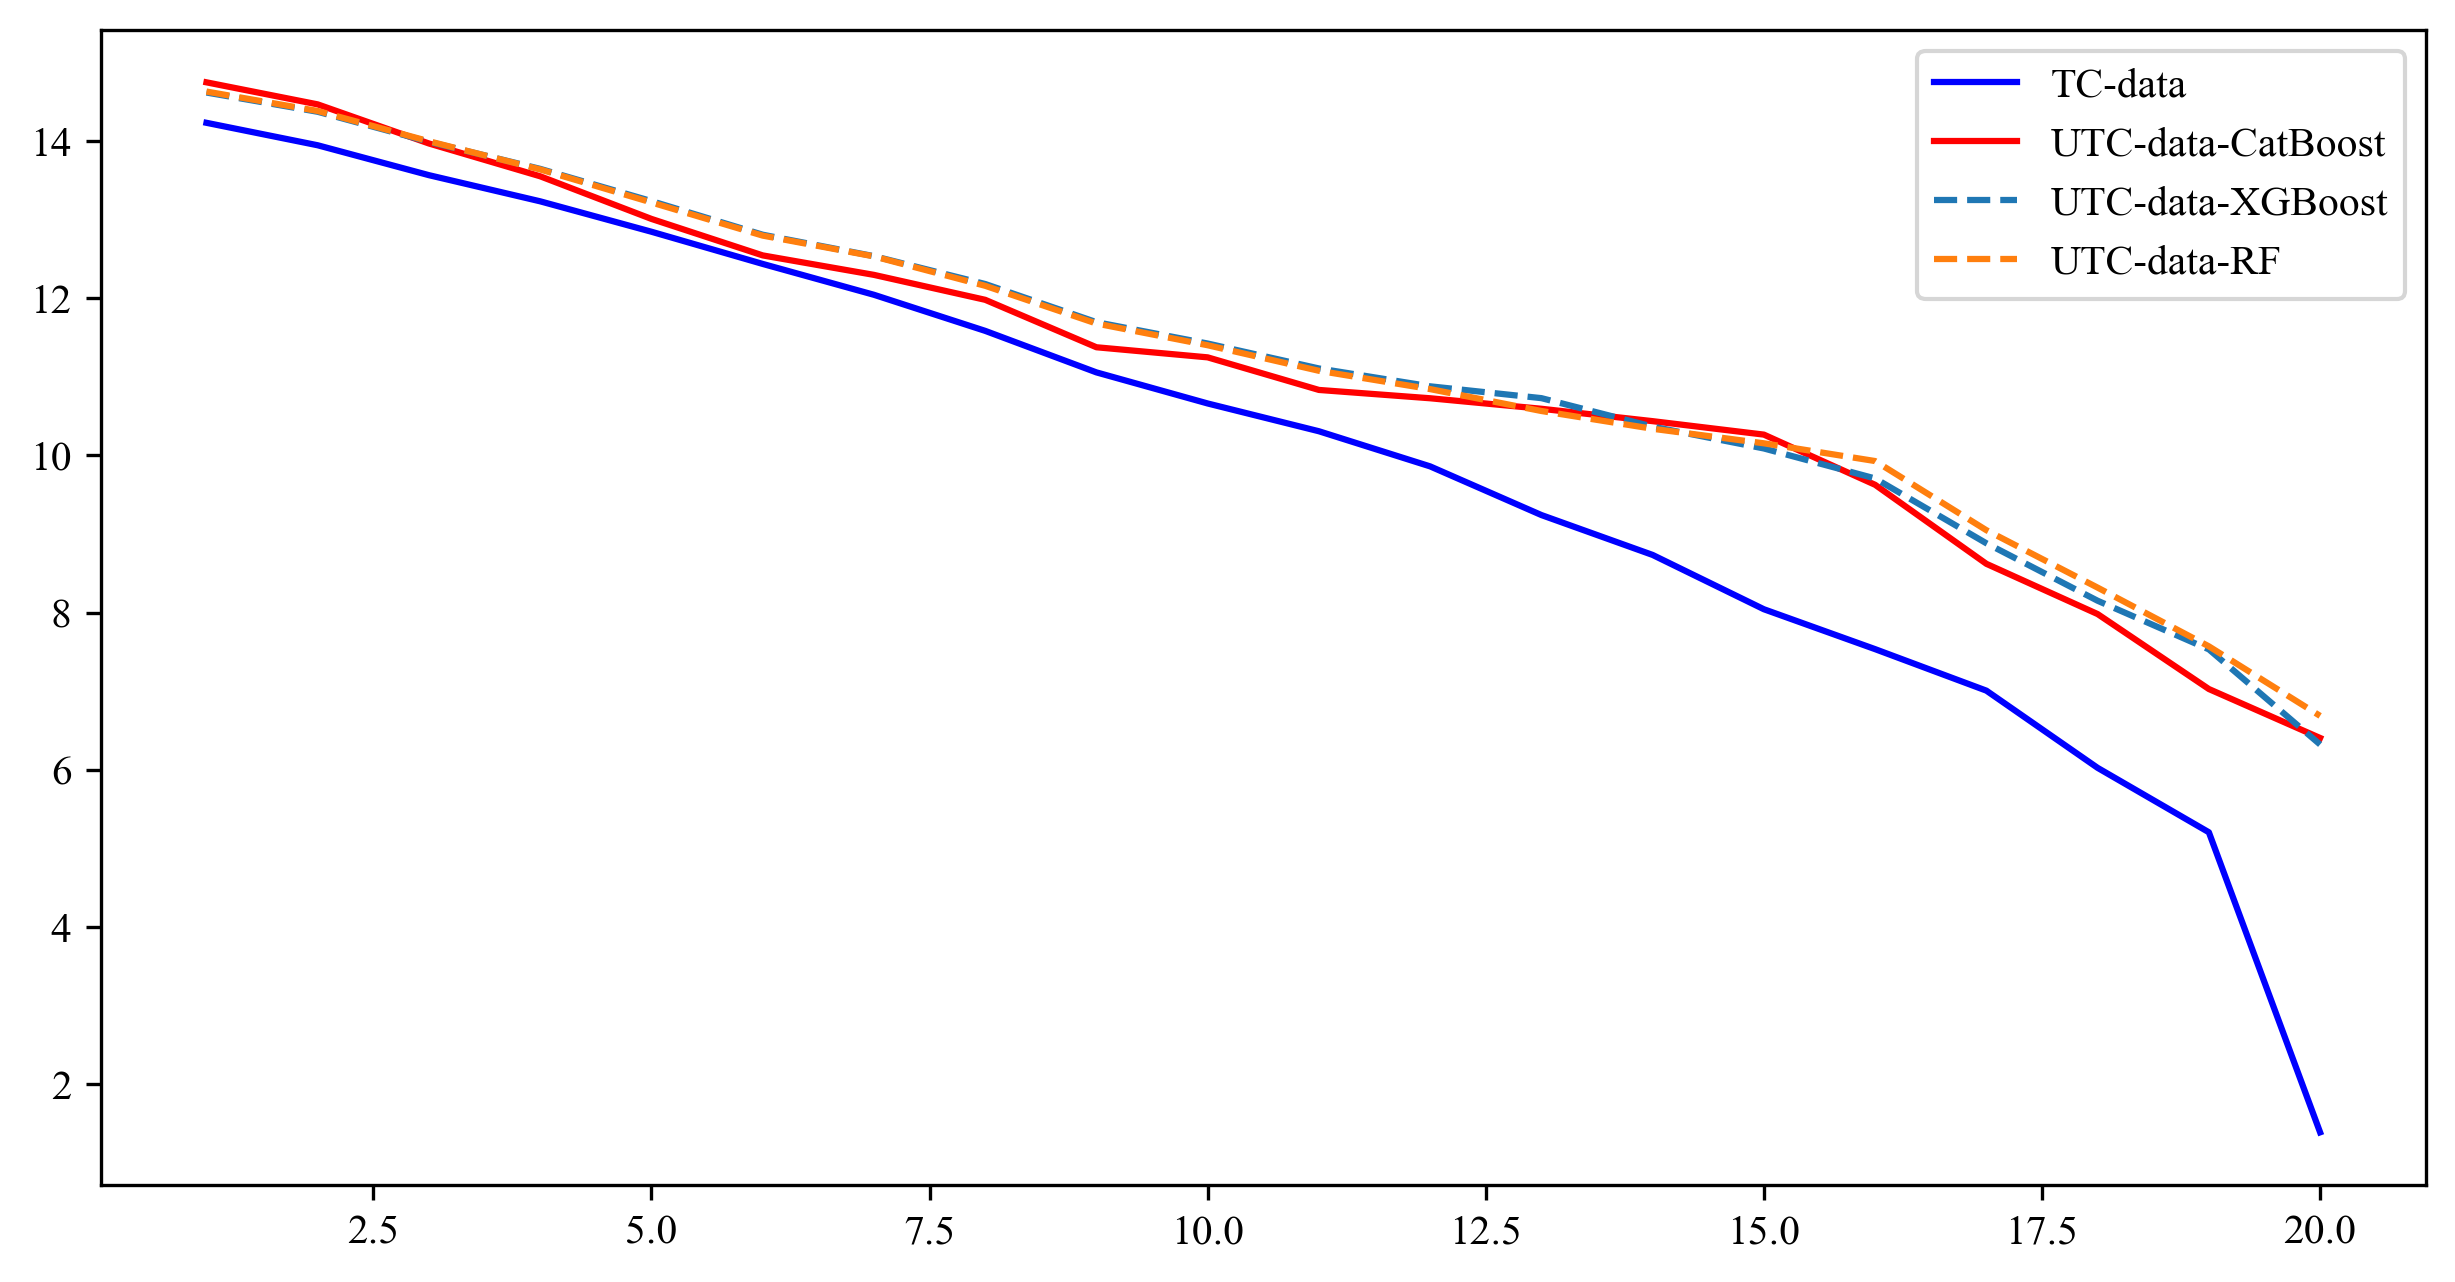

In [11]:
# 1min 有round 带SVM ln
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][1:20].index,np.log(TC_data[r]['count'][1:20]),label='TC-data',linewidth=lw,color='blue')
ax1 = plt.plot(UTC_data_CatBoost[r][1:20].index,np.log(UTC_data_CatBoost[r]['count'][1:20]),label='UTC-data-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][1:20].index,np.log(UTC_data_XGBoost[r]['count'][1:20]),label='UTC-data-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][1:20].index,np.log(UTC_data_RF[r]['count'][1:20]),label='UTC-data-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][1:20].index,np.log(UTC_data_SVM[r]['count'][1:20]),label='UTC-data-SVM',linewidth=lw, linestyle='--')
ax1 = plt.legend()

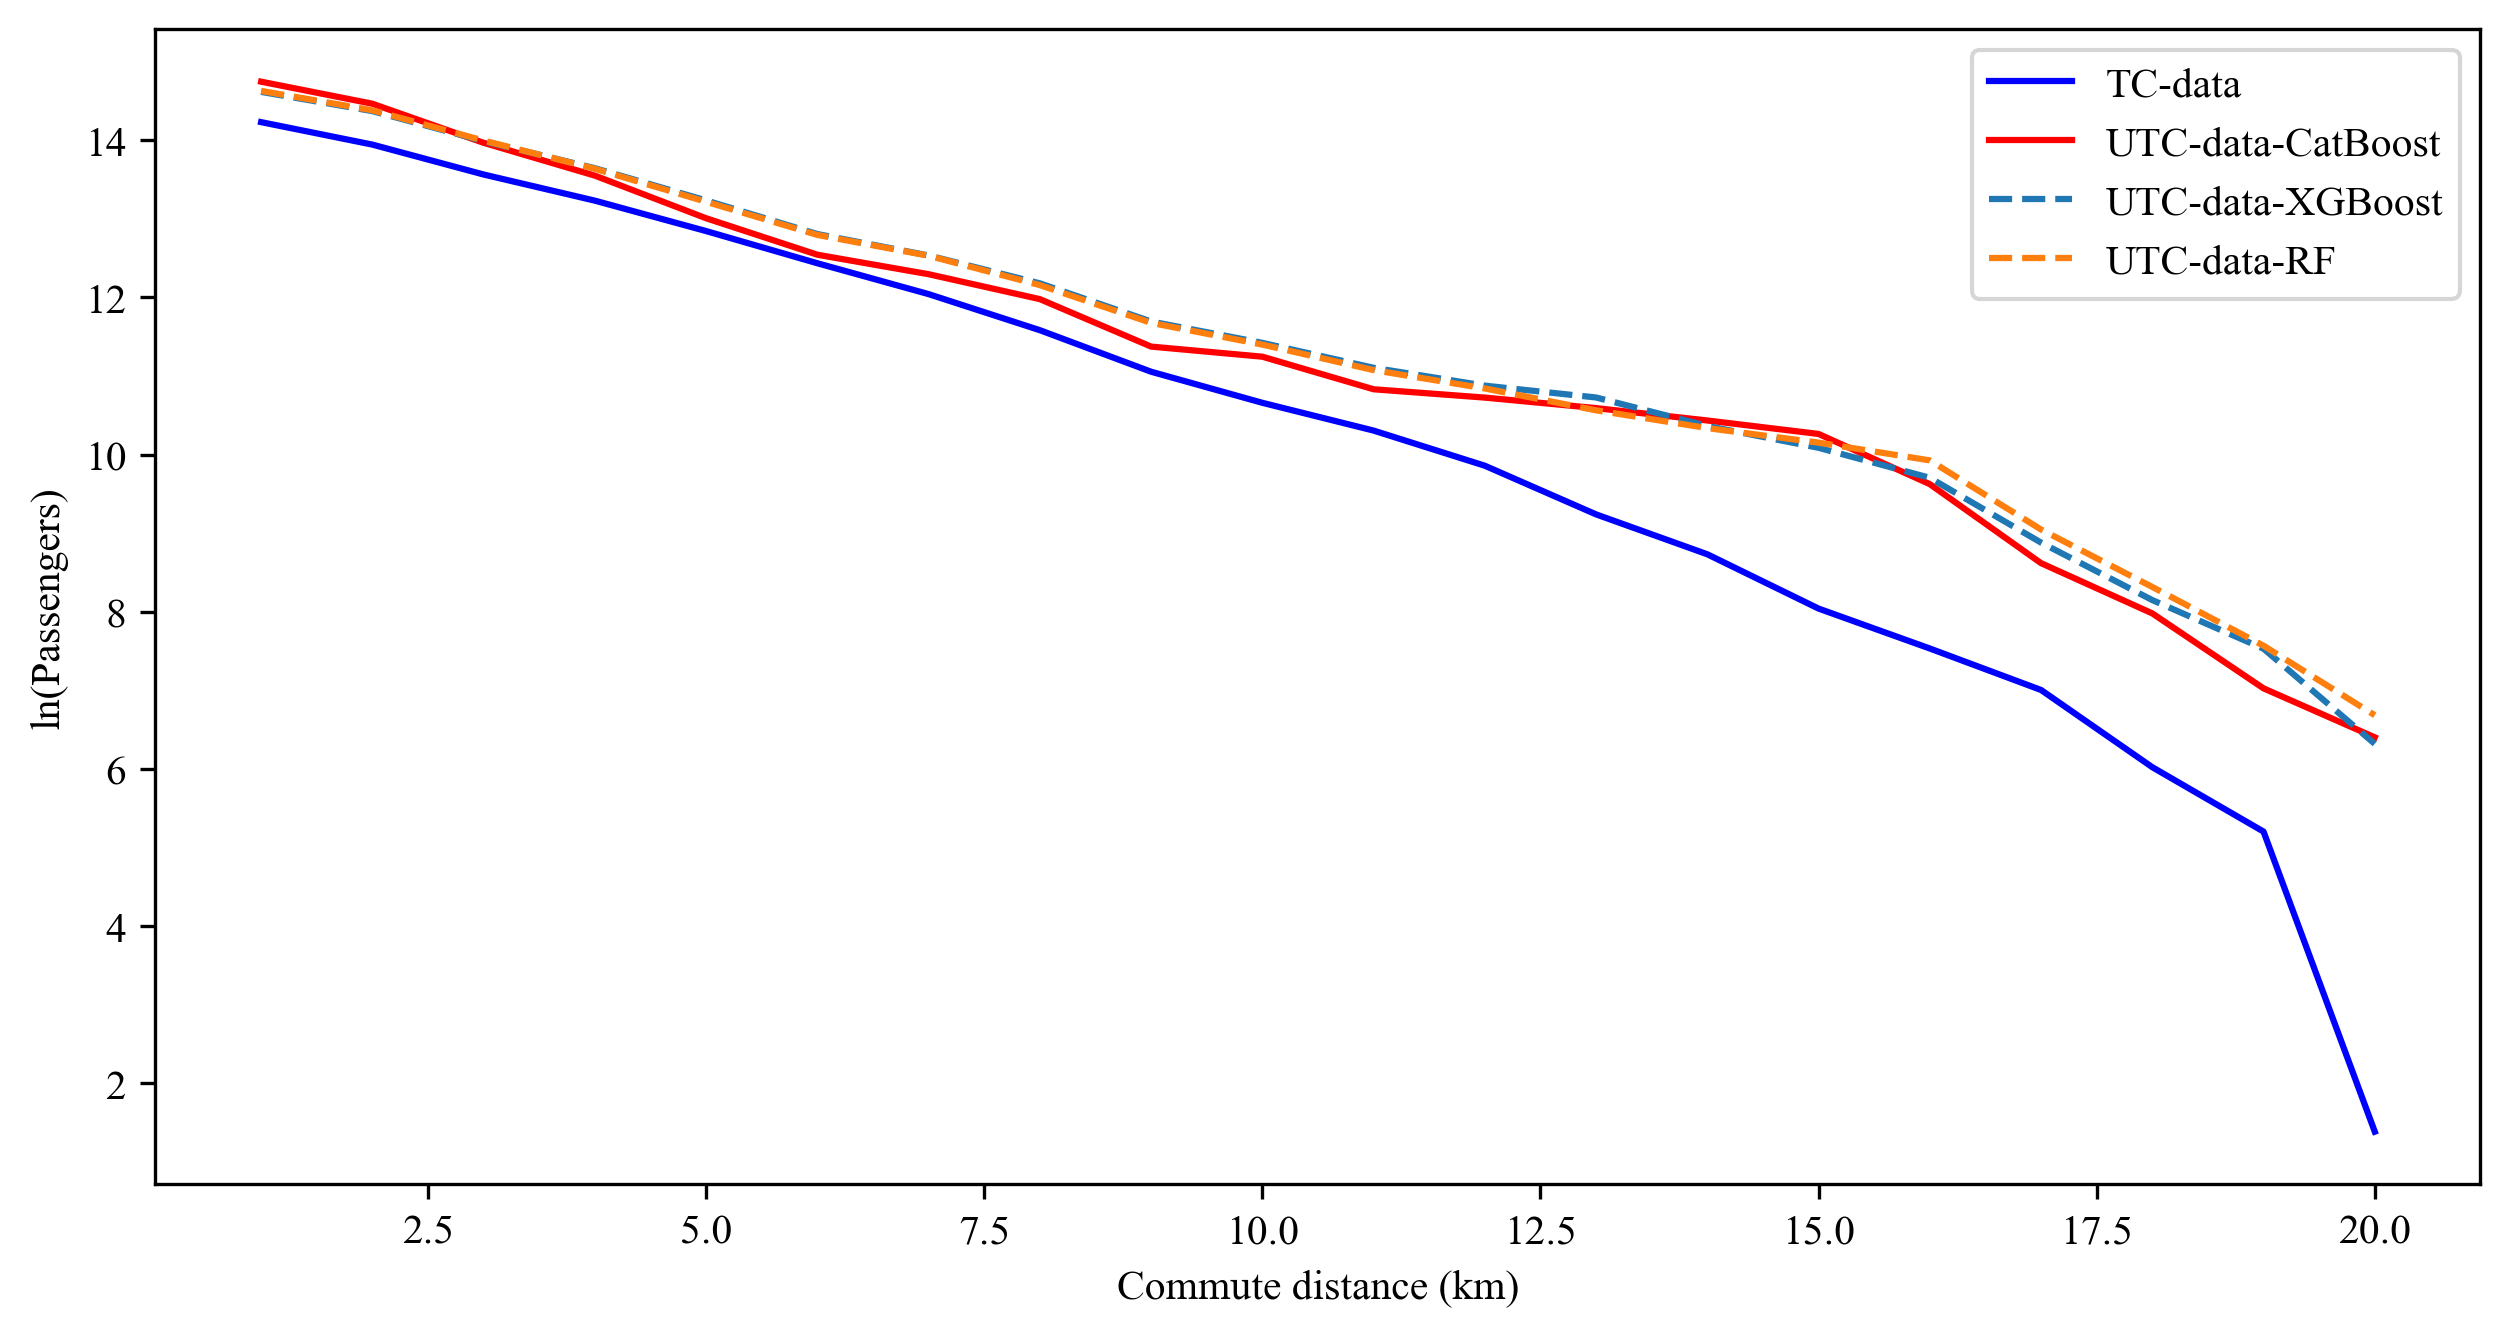

In [9]:
# 1min 有round 带SVM ln
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][1:20].index,np.log(TC_data[r]['count'][1:20]),label='TC-data',linewidth=lw,color='blue')
ax1 = plt.plot(UTC_data_CatBoost[r][1:20].index,np.log(UTC_data_CatBoost[r]['count'][1:20]),label='UTC-data-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][1:20].index,np.log(UTC_data_XGBoost[r]['count'][1:20]),label='UTC-data-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][1:20].index,np.log(UTC_data_RF[r]['count'][1:20]),label='UTC-data-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][1:20].index,np.log(UTC_data_SVM[r]['count'][1:20]),label='UTC-data-SVM',linewidth=lw, linestyle='--')
plt.xlabel('Commute distance (km)')
plt.ylabel('ln(Passengers)')
ax1 = plt.legend()

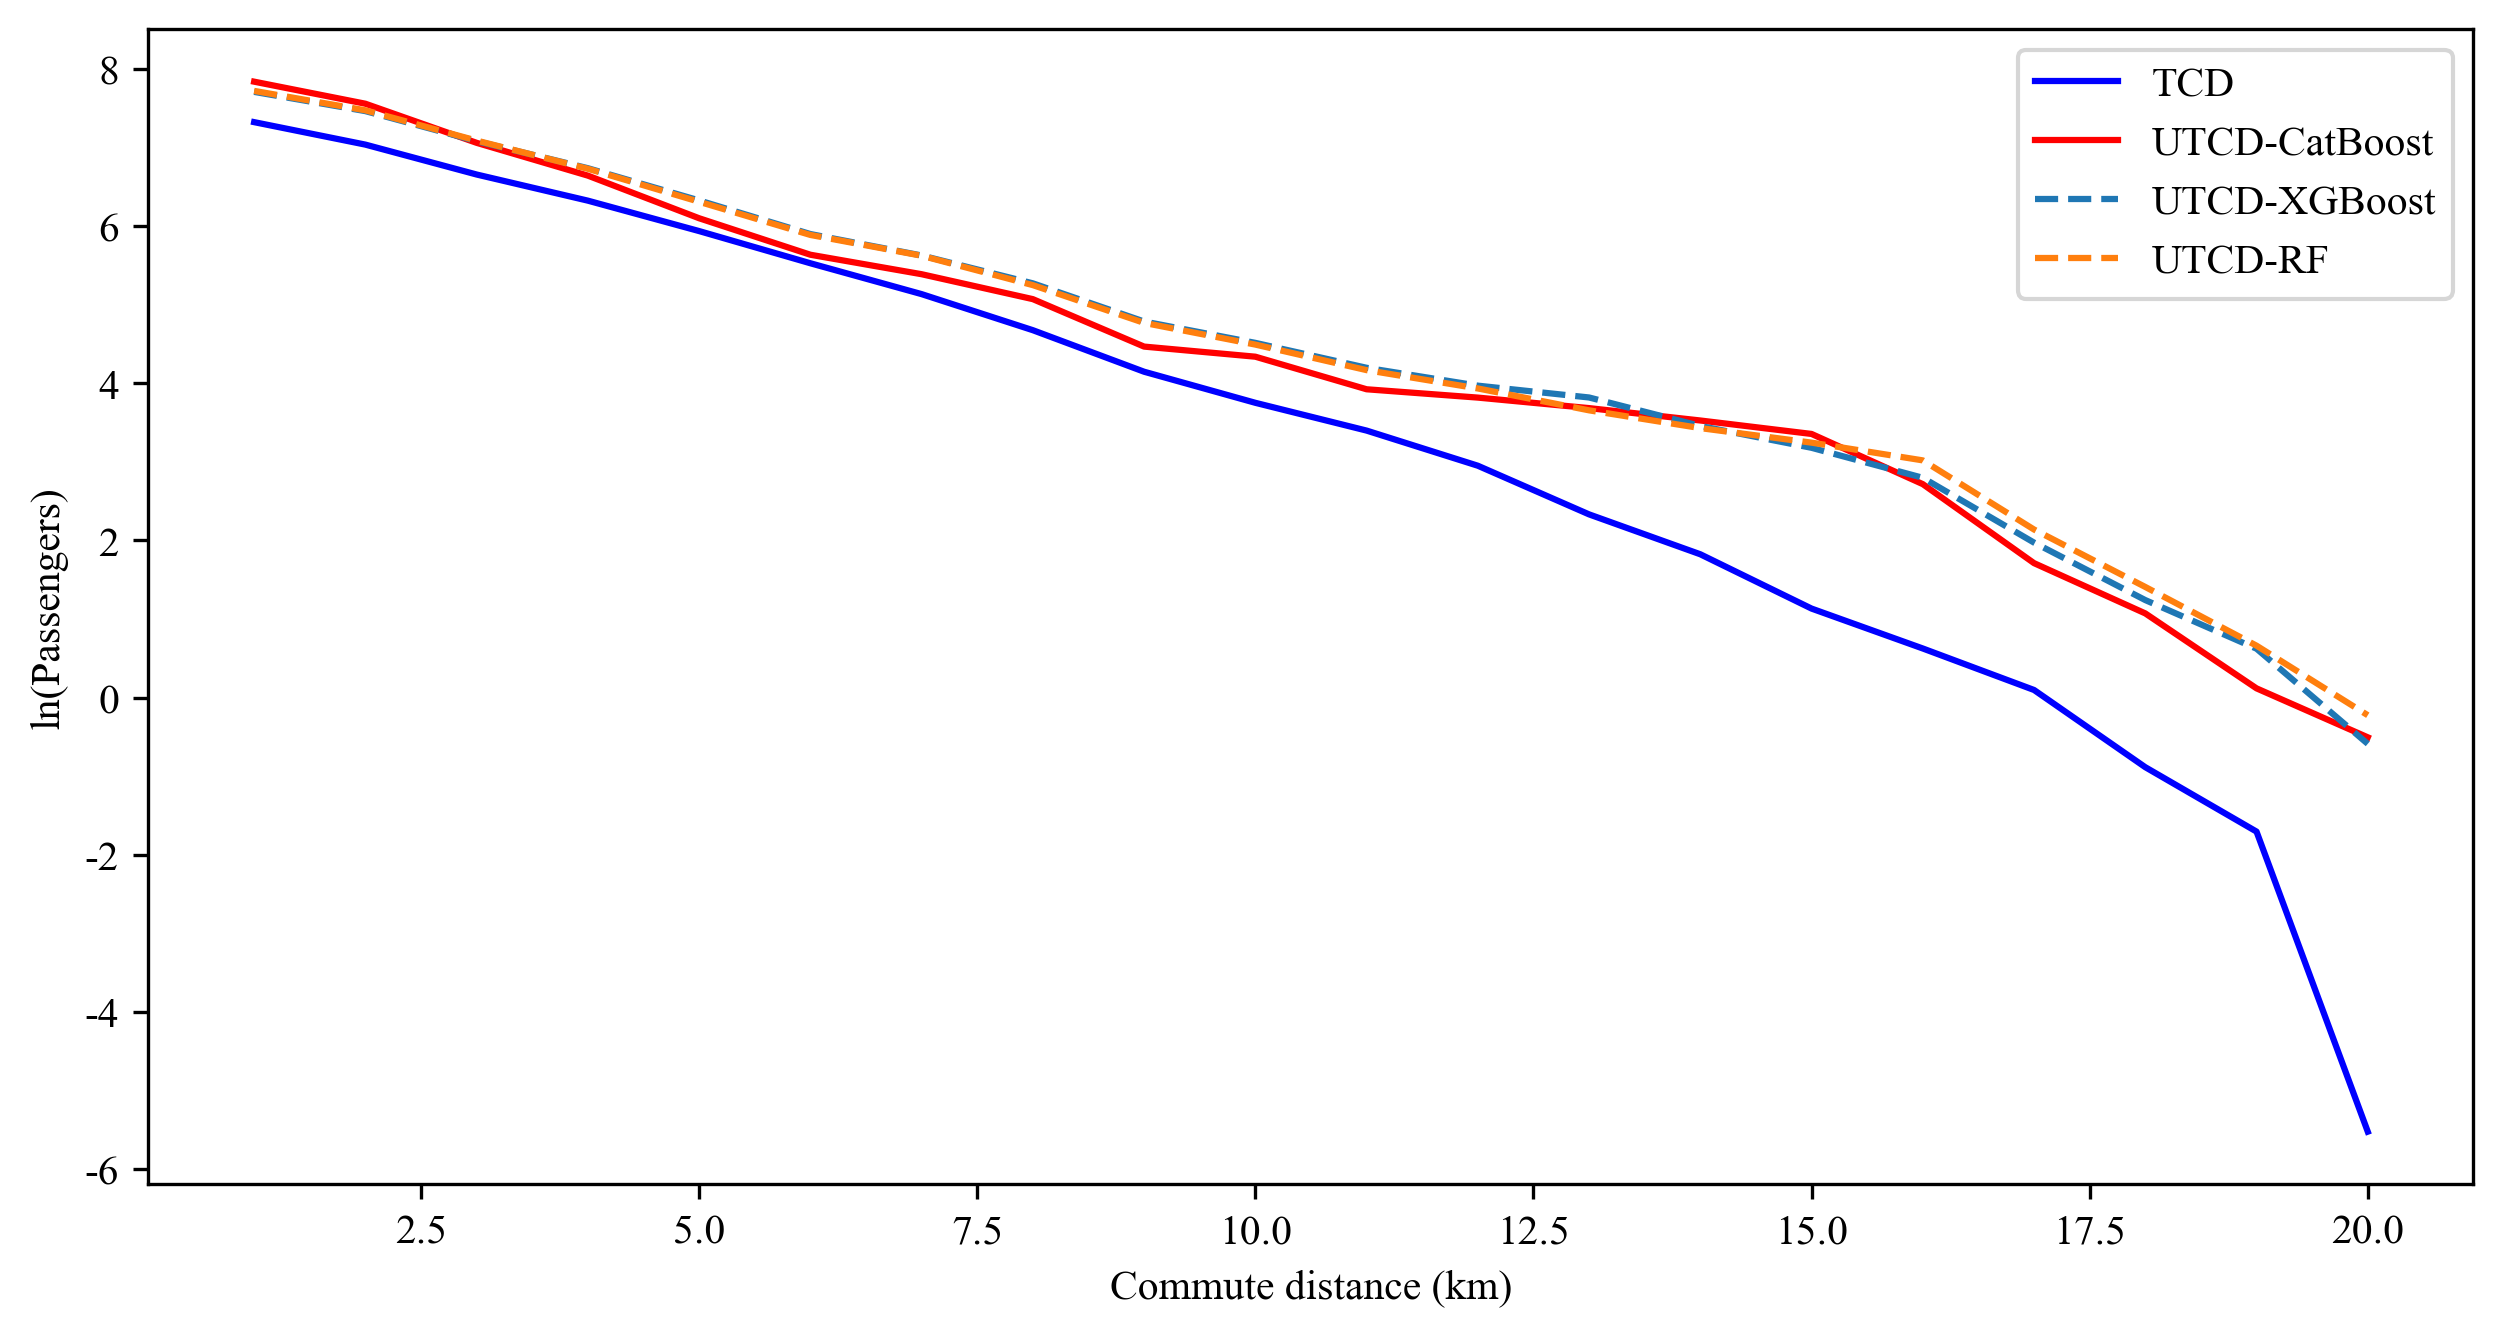

In [8]:
# 1min 有round ln
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][1:20].index,np.log(TC_data[r]['count'][1:20] / 1000),label='TCD',linewidth=lw,color='blue')
ax1 = plt.plot(UTC_data_CatBoost[r][1:20].index,np.log(UTC_data_CatBoost[r]['count'][1:20] / 1000),label='UTCD-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][1:20].index,np.log(UTC_data_XGBoost[r]['count'][1:20] / 1000),label='UTCD-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][1:20].index,np.log(UTC_data_RF[r]['count'][1:20] / 1000),label='UTCD-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][1:20].index,np.log(UTC_data_SVM[r]['count'][1:20]),label='UTC-data-SVM',linewidth=lw, linestyle='--')
plt.xlabel('Commute distance (km)')
plt.ylabel('ln(Passengers)')
ax1 = plt.legend()

In [ ]:
# 1min 有round ln
fig = plt.figure(dpi=300,figsize=(10,5))
ax1 = plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
lw = 1.5
r = 1
ax1 = plt.plot(TC_data[r][1:20].index,np.log(TC_data[r]['count'][1:20] / 1000),label='TCD',linewidth=lw,color='blue')
ax1 = plt.plot(UTC_data_CatBoost[r][1:20].index,np.log(UTC_data_CatBoost[r]['count'][1:20] / 1000),label='UTCD-CatBoost',linewidth=lw,color='red')
ax1 = plt.plot(UTC_data_XGBoost[r][1:20].index,np.log(UTC_data_XGBoost[r]['count'][1:20] / 1000),label='UTCD-XGBoost',linewidth=lw, linestyle='--')
ax1 = plt.plot(UTC_data_RF[r][1:20].index,np.log(UTC_data_RF[r]['count'][1:20] / 1000),label='UTCD-RF',linewidth=lw, linestyle='--')
# ax1 = plt.plot(UTC_data_SVM[r][1:20].index,np.log(UTC_data_SVM[r]['count'][1:20]),label='UTC-data-SVM',linewidth=lw, linestyle='--')
plt.xlabel('Commute distance (km)')
plt.ylabel('ln(Passengers)')
ax1 = plt.legend()

In [13]:
r2_score(np.log(TC_data[r]['count'][1:20]),np.log(UTC_data_CatBoost[r]['count'][1:20]))

0.7582260204954265

In [14]:
r2_score(np.log(TC_data[r]['count'][1:20]),np.log(UTC_data_XGBoost[r]['count'][1:20]))

0.737950353578573

In [15]:
r2_score(np.log(TC_data[r]['count'][1:20]),np.log(UTC_data_RF[r]['count'][1:20]))

0.7105975391236459

In [9]:
def metrics_log(y_test,y_pre):
    y_test = np.log(y_test)
    y_pre = np.log(y_pre)
    from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
    mse = mean_squared_error(y_test,y_pre)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pre)
    mape = mean_absolute_percentage_error(y_test,y_pre)
    r2 = r2_score(y_test,y_pre)
    return [rmse,mae,mape,r2]

In [10]:
metrics_log(TC_data[r]['count'][1:20],UTC_data_CatBoost[r]['count'][1:20])

[1.6045532137616159,
 1.1376023571882146,
 0.29231700166106156,
 0.7582260204954265]

In [13]:
metrics_log(TC_data[r]['count'][1:20],UTC_data_XGBoost[r]['count'][1:20])

[1.670479438171788, 1.2658143939629383, 0.30502928238851906, 0.737950353578573]

In [14]:
metrics_log(TC_data[r]['count'][1:20],UTC_data_RF[r]['count'][1:20])

[1.7554984693963953,
 1.3006212545676976,
 0.32128484784008016,
 0.7105975391236459]